In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
from getpass import getpass
from pathlib import Path
import pandas as pd
from scipy.stats import zscore
import numpy as np

In [2]:
# Colab cell
!pip install -q kaggle

os.environ['KAGGLE_USERNAME'] = input("kaggle username: ")
os.environ['KAGGLE_KEY'] = getpass("kaggle key (hidden): ")

In [3]:
# then download
dst = "/home/mohammed-hany/Documents/DEPI/MaintenX/data"
os.makedirs(dst, exist_ok=True)

# download and unzip into the workspace folder
!kaggle datasets download -d arnabbiswas1/microsoft-azure-predictive-maintenance -p {dst}
!unzip -q -o "{dst}/microsoft-azure-predictive-maintenance.zip" -d "{dst}/microsoft-azure-predictive-maintenance"

Dataset URL: https://www.kaggle.com/datasets/arnabbiswas1/microsoft-azure-predictive-maintenance
License(s): unknown
microsoft-azure-predictive-maintenance.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
project_root = Path("/home/mohammed-hany/Documents/DEPI/MaintenX")
data_dir = project_root / "data" / "microsoft-azure-predictive-maintenance"

print("Files:", list(data_dir.glob("*")))

# load a CSV
telemetry = pd.read_csv(data_dir / "PdM_telemetry.csv")
errors = pd.read_csv(data_dir / "PdM_errors.csv")
machines = pd.read_csv(data_dir / "PdM_machines.csv")
failures = pd.read_csv(data_dir / "PdM_failures.csv")
maintenance = pd.read_csv(data_dir / "PdM_maint.csv")

Files: [PosixPath('/home/mohammed-hany/Documents/DEPI/MaintenX/data/microsoft-azure-predictive-maintenance/PdM_maint.csv'), PosixPath('/home/mohammed-hany/Documents/DEPI/MaintenX/data/microsoft-azure-predictive-maintenance/PdM_errors.csv'), PosixPath('/home/mohammed-hany/Documents/DEPI/MaintenX/data/microsoft-azure-predictive-maintenance/PdM_telemetry.csv'), PosixPath('/home/mohammed-hany/Documents/DEPI/MaintenX/data/microsoft-azure-predictive-maintenance/PdM_failures.csv'), PosixPath('/home/mohammed-hany/Documents/DEPI/MaintenX/data/microsoft-azure-predictive-maintenance/PdM_machines.csv')]


# telemetry

In [104]:
telemetry['datetime'] = pd.to_datetime(telemetry['datetime'])
telemetry.head()

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511


In [7]:
telemetry.dtypes

,0
datetime,datetime64[ns]
machineID,int64
volt,float64
rotate,float64
pressure,float64
vibration,float64


In [8]:
telemetry.describe().T

,count,mean,min,25%,50%,75%,max,std
datetime,876100,2015-07-02 18:00:00,2015-01-01 06:00:00,2015-04-02 12:00:00,2015-07-02 18:00:00,2015-10-02 00:00:00,2016-01-01 06:00:00,NaN
machineID,876100.0,50.5,1.0,25.75,50.5,75.25,100.0,28.866087
volt,876100.0,170.777736,97.333604,160.304927,170.607338,181.004493,255.124717,15.509114
rotate,876100.0,446.605119,138.432075,412.305714,447.55815,482.1766,695.020984,52.673886
pressure,876100.0,100.858668,51.237106,93.498181,100.425559,107.555231,185.951998,11.048679
vibration,876100.0,40.385007,14.877054,36.777299,40.237247,43.784938,76.791072,5.370361


In [9]:
telemetry.isnull().sum()

,0
datetime,0
machineID,0
volt,0
rotate,0
pressure,0
vibration,0


In [10]:
print("Unique Machines:", telemetry.machineID.nunique())

Unique Machines: 100


In [11]:
print("Duplicates:", telemetry.duplicated().sum())

Duplicates: 0


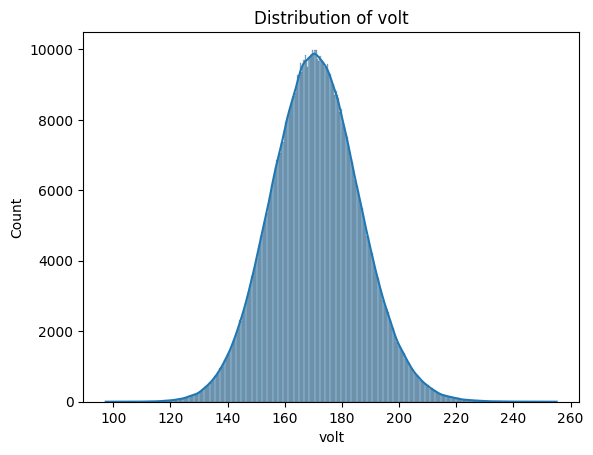

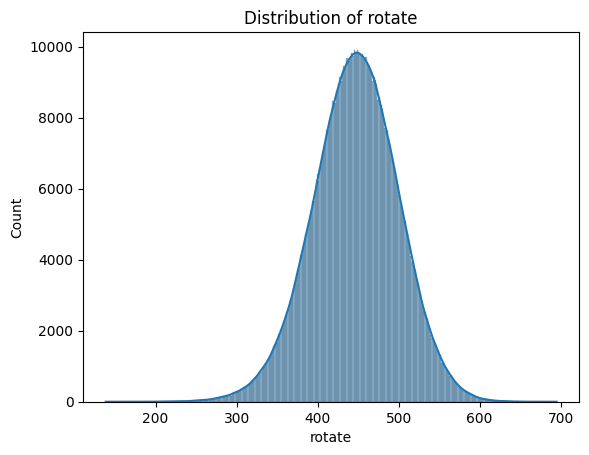

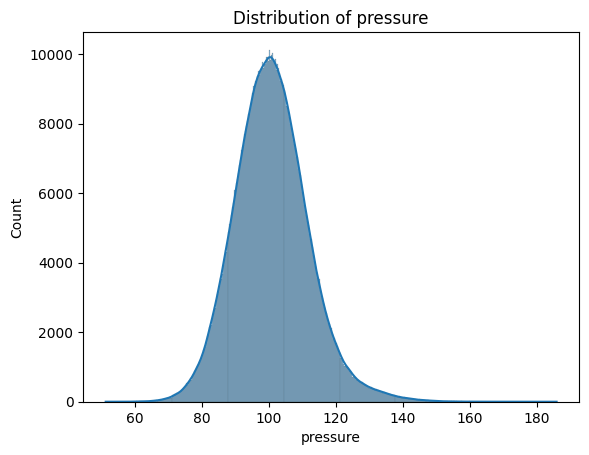

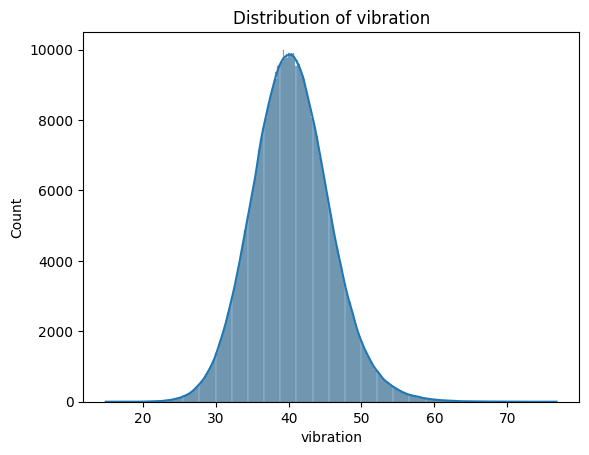

In [12]:
sensor_cols = ["volt", "rotate", "pressure", "vibration"]

for col in sensor_cols:
    plt.figure()
    sns.histplot(telemetry[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

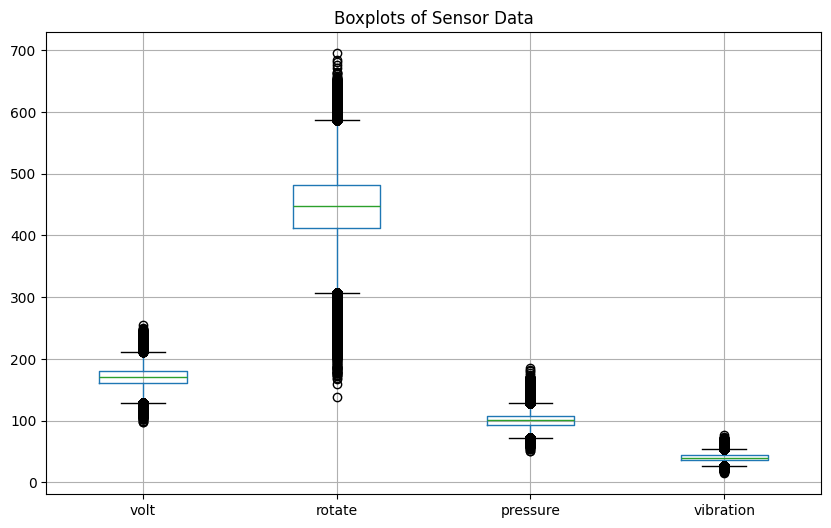

In [38]:
plt.figure(figsize=(10,6))
telemetry[sensor_cols].boxplot()
plt.title("Boxplots of Sensor Data")
plt.show()

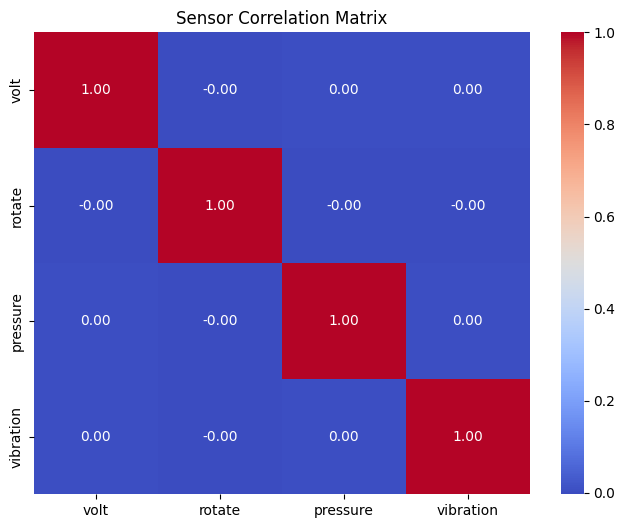

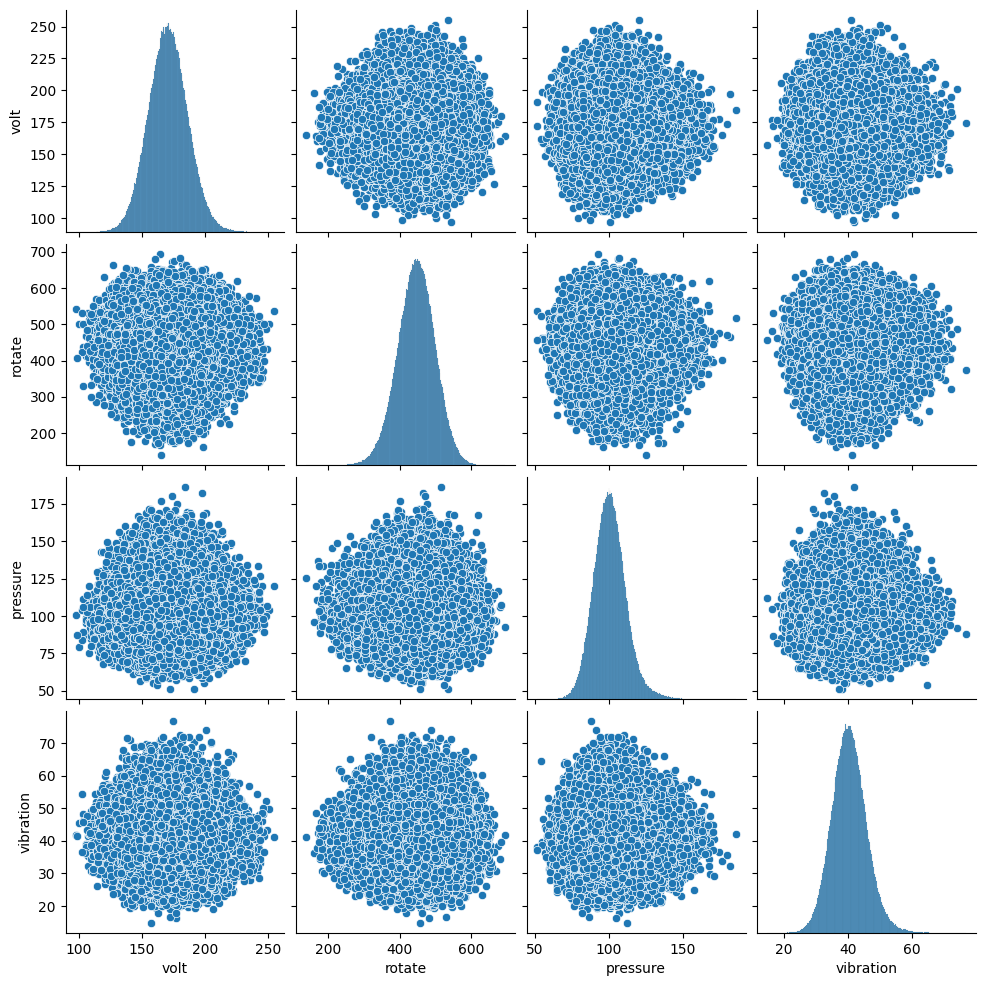

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(telemetry[sensor_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Sensor Correlation Matrix")
plt.show()

sns.pairplot(telemetry[sensor_cols])
plt.show()

In [16]:
summary = telemetry.groupby("machineID")[sensor_cols].describe()
summary

volt                                                             \
            count        mean        std         min         25%         50%   
machineID                                                                      
1          8761.0  170.833898  15.314388  119.059047  160.382124  170.618459   
2          8761.0  170.760482  15.537243  112.486614  160.461557  170.646058   
3          8761.0  170.659235  15.380310  121.894461  160.357597  170.381146   
4          8761.0  170.659728  15.464553  100.194137  160.172026  170.586470   
5          8761.0  171.044435  15.546820  119.702416  160.372876  170.707605   
...           ...         ...        ...         ...         ...         ...   
96         8761.0  170.614552  15.568695  112.008342  160.301421  170.462856   
97         8761.0  170.343383  15.327326  103.420790  160.054890  170.250286   
98         8761.0  170.782478  16.019581  117.104639  159.981127  170.473981   
99         8761.0  170.727884  15.669937  115.374750  160.157455  170.576318   
100        8761.0  170.692471  15.486331  118.185929  160.352305  170.307139   

                                   rotate              ...    pressure  \
                  75%         max   count        mean  ...         75%   
machineID                                              ...               
1          180.929341  237.938518  8761.0  446.336502  ...  107.377475   
2          180.892158  235.114772  8761.0  446.388915  ...  107.231281   
3          180.812816  234.950829  8761.0  446.583238  ...  107.244134   
4          180.779110  241.516461  8761.0  446.053801  ...  107.316597   
5          181.379158  228.298139  8761.0  446.858577  ...  107.490348   
...               ...         ...     ...         ...  ...         ...   
96         180.919729  233.712717  8761.0  448.311054  ...  108.211361   
97         180.742411  227.250202  8761.0  447.032374  ...  107.852967   
98         181.071383  236.510251  8761.0  446.066974  ...  108.432362   
99         181.146527  235.001645  8761.0  444.766488  ...  108.267951   
100        180.687596  243.686972  8761.0  448.277077  ...  107.364099   

                      vibration                                             \
                  max     count       mean       std        min        25%   
machineID                                                                    
1          155.257527    8761.0  40.586309  5.542143  22.666865  36.847203   
2          150.848378    8761.0  40.301539  5.313053  22.078087  36.653575   
3          153.600538    8761.0  40.475376  5.248968  22.739546  36.984111   
4          152.052407    8761.0  40.341620  5.299423  19.955458  36.864602   
5          182.111770    8761.0  40.264846  5.296243  21.883375  36.697668   
...               ...       ...        ...       ...        ...        ...   
96         153.772799    8761.0  40.248600  5.300788  22.237622  36.666839   
97         151.859566    8761.0  40.552751  5.431440  22.281260  36.921560   
98         162.828655    8761.0  40.499608  5.430886  20.264144  36.844996   
99         154.095588    8761.0  40.524730  5.583516  22.860919  36.799832   
100        151.824772    8761.0  40.321833  5.306350  17.823424  36.816506   

                                            
                 50%        75%        max  
machineID                                   
1          40.417442  44.004311  67.633435  
2          40.221000  43.730378  64.097877  
3          40.344752  43.799068  62.866344  
4          40.129696  43.674152  70.365920  
5          40.177993  43.654156  63.252497  
...              ...        ...        ...  
96         40.062871  43.745775  61.878244  
97         40.379478  44.044928  66.454029  
98         40.309858  43.893451  64.591908  
99         40.350960  43.919249  68.016550  
100        40.234529  43.685637  68.019808  

[100 rows x 32 columns]

In [19]:
telemetry_z = telemetry.copy()
for col in sensor_cols:
    telemetry_z[col + "_z"] = zscore(telemetry[col])

# Points with |z| > 3
anomalies = telemetry_z[(telemetry_z[[c + "_z" for c in sensor_cols]].abs() > 3).any(axis=1)]
print(anomalies.head())
len(anomalies)

              datetime  machineID        volt      rotate    pressure  \
56 2015-01-03 14:00:00          1  166.480684  487.422676   90.423892   
61 2015-01-03 19:00:00          1  166.090409  425.803431   87.685418   
67 2015-01-04 01:00:00          1  168.969595  467.285905  117.148227   
68 2015-01-04 02:00:00          1  165.187401  475.126937  114.584421   
69 2015-01-04 03:00:00          1  192.065086  506.595129  113.672301   

    vibration    volt_z  rotate_z  pressure_z  vibration_z  
56  66.764515 -0.277066  0.774911   -0.944437     4.912058  
61  57.928057 -0.302231 -0.394915   -1.192293     3.266645  
67  58.392050 -0.116586  0.392620    1.474345     3.353044  
68  57.549016 -0.360455  0.541480    1.242299     3.196065  
69  57.809162  1.372571  1.138895    1.159744     3.244506  


17975

# errors

In [5]:
errors.head()

,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4


In [6]:
errors['datetime'] = pd.to_datetime(errors['datetime'])
errors.dtypes

,0
datetime,datetime64[ns]
machineID,int64
errorID,object


In [7]:
errors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3919 entries, 0 to 3918
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   datetime   3919 non-null   datetime64[ns]
 1   machineID  3919 non-null   int64         
 2   errorID    3919 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 92.0+ KB


In [10]:
errors.describe().T

,count,mean,min,25%,50%,75%,max,std
datetime,3919,2015-07-01 03:34:18.586374144,2015-01-01 06:00:00,2015-03-31 05:00:00,2015-07-01 06:00:00,2015-10-01 15:00:00,2016-01-01 05:00:00,NaN
machineID,3919.0,51.044654,1.0,25.0,51.0,77.0,100.0,28.954988


In [11]:
errors.describe(include='object').T

,count,unique,top,freq
errorID,3919,5,error1,1010


In [12]:
print("Unique Machines:", errors.machineID.nunique())

Unique Machines: 100


In [13]:
print("Unique Error Types:", errors.errorID.unique())

Unique Error Types: ['error1' 'error3' 'error5' 'error4' 'error2']


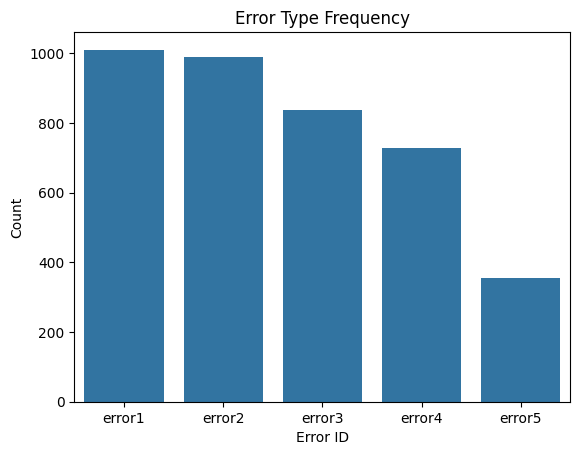

In [14]:
plt.figure()
sns.countplot(data=errors, x='errorID', order=errors['errorID'].value_counts().index)
plt.title("Error Type Frequency")
plt.xlabel("Error ID")
plt.ylabel("Count")
plt.show()

In [15]:
print("\nError Frequency Table:")
print(errors['errorID'].value_counts())


Error Frequency Table:
errorID
error1    1010
error2     988
error3     838
error4     727
error5     356
Name: count, dtype: int64


In [18]:
print("\nError Count by Machine:")
print(errors.groupby('machineID')['errorID'].count())


Error Count by Machine:
machineID
1      35
2      28
3      39
4      31
5      38
       ..
96     39
97     45
98     45
99     54
100    31
Name: errorID, Length: 100, dtype: int64


In [21]:
errors['time_diff'] = errors.groupby('machineID')['datetime'].diff()

errors[['machineID', 'datetime', 'errorID', 'time_diff']]

,machineID,datetime,errorID,time_diff
0,1,2015-01-03 07:00:00,error1,NaT
1,1,2015-01-03 20:00:00,error3,0 days 13:00:00
2,1,2015-01-04 06:00:00,error5,0 days 10:00:00
3,1,2015-01-10 15:00:00,error4,6 days 09:00:00
4,1,2015-01-22 10:00:00,error4,11 days 19:00:00
...,...,...,...,...
3914,100,2015-11-21 08:00:00,error2,9 days 07:00:00
3915,100,2015-12-04 02:00:00,error1,12 days 18:00:00
3916,100,2015-12-08 06:00:00,error2,4 days 04:00:00
3917,100,2015-12-08 06:00:00,error3,0 days 00:00:00


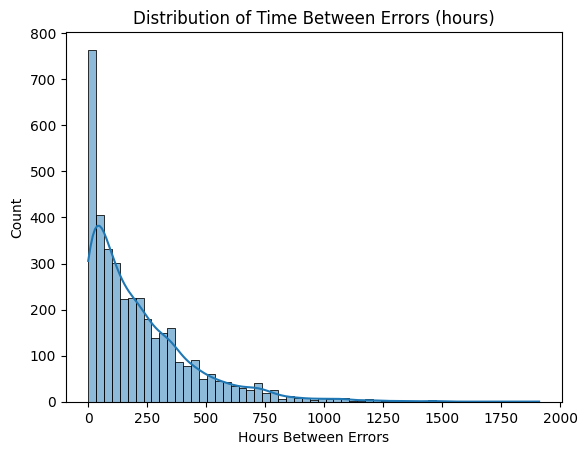

In [22]:
plt.figure()
sns.histplot(errors['time_diff'].dt.total_seconds() / 3600, kde=True)
plt.title("Distribution of Time Between Errors (hours)")
plt.xlabel("Hours Between Errors")
plt.show()

# machines

In [24]:
machines.head()

,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


In [25]:
machines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   machineID  100 non-null    int64 
 1   model      100 non-null    object
 2   age        100 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


In [26]:
machines.describe().T

,count,mean,std,min,25%,50%,75%,max
machineID,100.0,50.50,29.011492,1.0,25.75,50.5,75.25,100.0
age,100.0,11.33,5.856974,0.0,6.75,12.0,16.00,20.0


In [27]:
machines.describe(include='object').T

,count,unique,top,freq
model,100,4,model3,35


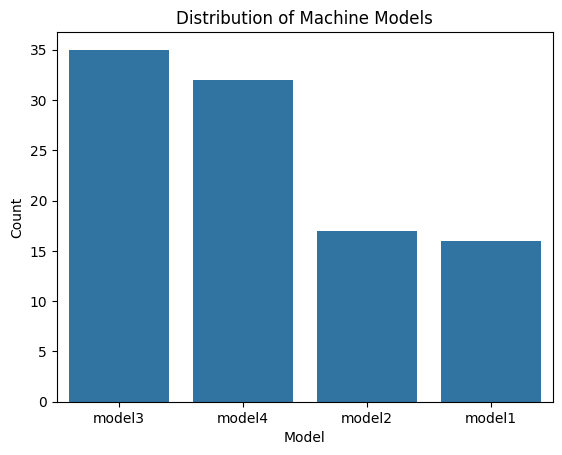

In [28]:
plt.figure()
sns.countplot(data=machines, x='model', order=machines['model'].value_counts().index)
plt.title("Distribution of Machine Models")
plt.xlabel("Model")
plt.ylabel("Count")
plt.show()

In [29]:
machines['model'].value_counts()

,count
model,
model3,35
model4,32
model2,17
model1,16


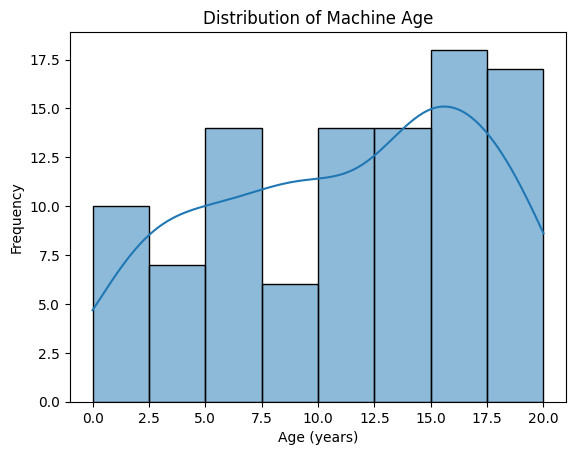

In [30]:
plt.figure()
sns.histplot(machines['age'], kde=True)
plt.title("Distribution of Machine Age")
plt.xlabel("Age (years)")
plt.ylabel("Frequency")
plt.show()

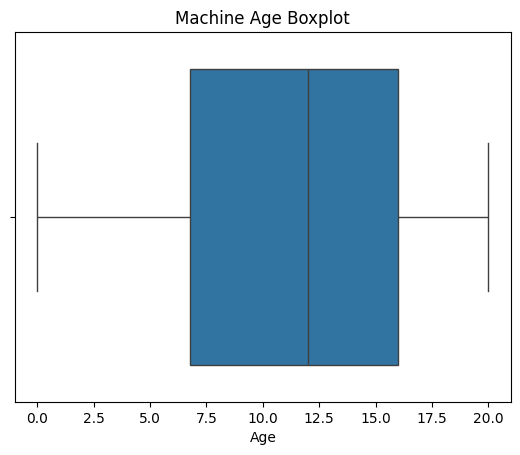

In [31]:
plt.figure()
sns.boxplot(data=machines, x='age')
plt.title("Machine Age Boxplot")
plt.xlabel("Age")
plt.show()

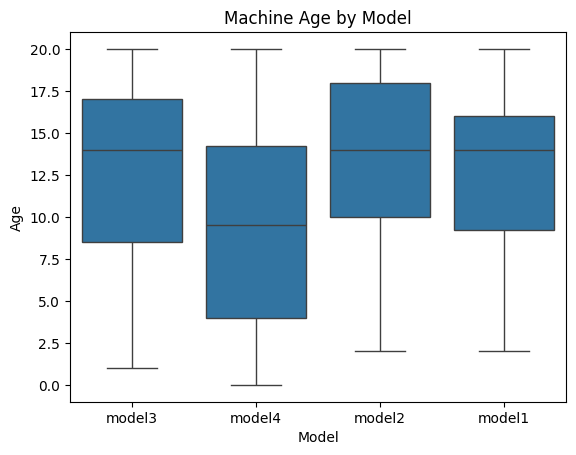

In [33]:
plt.figure()
sns.boxplot(data=machines, x='model', y='age')
plt.title("Machine Age by Model")
plt.xlabel("Model")
plt.ylabel("Age")
plt.show()

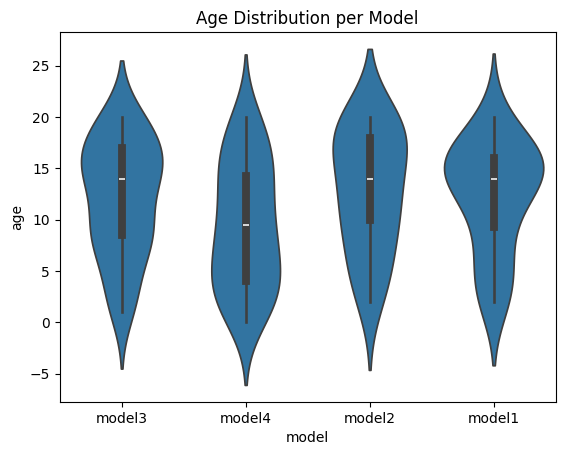

In [34]:
plt.figure()
sns.violinplot(data=machines, x='model', y='age')
plt.title("Age Distribution per Model")
plt.show()

In [36]:
model_age_mean = machines.groupby('model')['age'].mean()
model_age_mean

,age
model,
model1,12.250000
model2,12.764706
model3,12.028571
model4,9.343750


# failures

In [37]:
failures.head()

,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


In [38]:
failures['datetime'] = pd.to_datetime(failures['datetime'])
failures.dtypes

,0
datetime,datetime64[ns]
machineID,int64
failure,object


In [39]:
failures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   datetime   761 non-null    datetime64[ns]
 1   machineID  761 non-null    int64         
 2   failure    761 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 18.0+ KB


In [40]:
failures.describe().T

,count,mean,min,25%,50%,75%,max,std
datetime,761,2015-06-24 12:12:17.976346880,2015-01-02 03:00:00,2015-03-23 06:00:00,2015-06-24 06:00:00,2015-09-23 06:00:00,2015-12-31 06:00:00,NaN
machineID,761.0,51.911958,1.0,24.0,51.0,79.0,100.0,29.515542


In [41]:
failures.describe(include='object').T

,count,unique,top,freq
failure,761,4,comp2,259


In [42]:
print("Unique failure types:", failures['failure'].unique())

Unique failure types: ['comp4' 'comp1' 'comp2' 'comp3']


In [43]:
print("Unique machines:", failures['machineID'].nunique())

Unique machines: 98


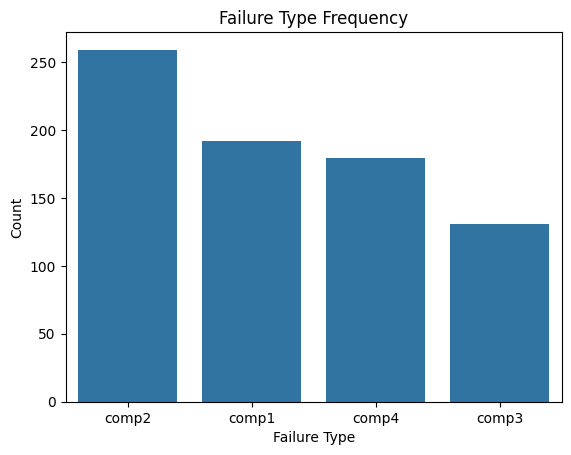

In [44]:
plt.figure()
sns.countplot(data=failures, x='failure', order=failures['failure'].value_counts().index)
plt.title("Failure Type Frequency")
plt.xlabel("Failure Type")
plt.ylabel("Count")
plt.show()

In [45]:
print("\nFailure Frequency Table:")
print(failures['failure'].value_counts())


Failure Frequency Table:
failure
comp2    259
comp1    192
comp4    179
comp3    131
Name: count, dtype: int64


In [49]:
print("Failure Count by Machine:")
print(failures.groupby('machineID')['failure'].count())

Failure Count by Machine:
machineID
1       7
2       4
3       5
4       6
5       7
       ..
96      5
97      8
98     16
99     19
100     3
Name: failure, Length: 98, dtype: int64


In [52]:
failures['time_diff'] = failures.groupby('machineID')['datetime'].diff()

failures[['machineID', 'datetime', 'failure', 'time_diff']]

,machineID,datetime,failure,time_diff
0,1,2015-01-05 06:00:00,comp4,NaT
1,1,2015-03-06 06:00:00,comp1,60 days
2,1,2015-04-20 06:00:00,comp2,45 days
3,1,2015-06-19 06:00:00,comp4,60 days
4,1,2015-09-02 06:00:00,comp4,75 days
...,...,...,...,...
756,99,2015-11-29 06:00:00,comp3,30 days
757,99,2015-12-14 06:00:00,comp4,15 days
758,100,2015-02-12 06:00:00,comp1,NaT
759,100,2015-09-10 06:00:00,comp1,210 days


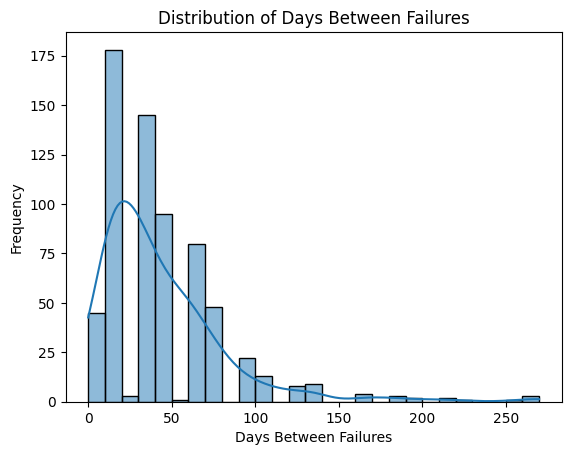

In [53]:
plt.figure()
sns.histplot(failures['time_diff'].dt.days, kde=True)
plt.title("Distribution of Days Between Failures")
plt.xlabel("Days Between Failures")
plt.ylabel("Frequency")
plt.show()

# maintenance

In [56]:
maintenance.head()

,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3
3,2014-12-13 06:00:00,1,comp1
4,2015-01-05 06:00:00,1,comp4


In [57]:
maintenance['datetime'] = pd.to_datetime(maintenance['datetime'])
maintenance.dtypes

,0
datetime,datetime64[ns]
machineID,int64
comp,object


In [58]:
maintenance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3286 entries, 0 to 3285
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   datetime   3286 non-null   datetime64[ns]
 1   machineID  3286 non-null   int64         
 2   comp       3286 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 77.1+ KB


In [59]:
maintenance.describe().T

,count,mean,min,25%,50%,75%,max,std
datetime,3286,2015-05-30 14:40:36.518563840,2014-06-01 06:00:00,2015-03-03 06:00:00,2015-06-13 06:00:00,2015-09-18 00:00:00,2016-01-01 06:00:00,NaN
machineID,3286.0,50.284236,1.0,25.25,50.0,75.0,100.0,28.914478


In [60]:
maintenance.describe(include='object').T

,count,unique,top,freq
comp,3286,4,comp2,863


In [62]:
print("Unique Machines:", maintenance['machineID'].nunique())

Unique Machines: 100


In [61]:
print("Unique Components:", maintenance['comp'].unique())

Unique Components: ['comp2' 'comp4' 'comp3' 'comp1']


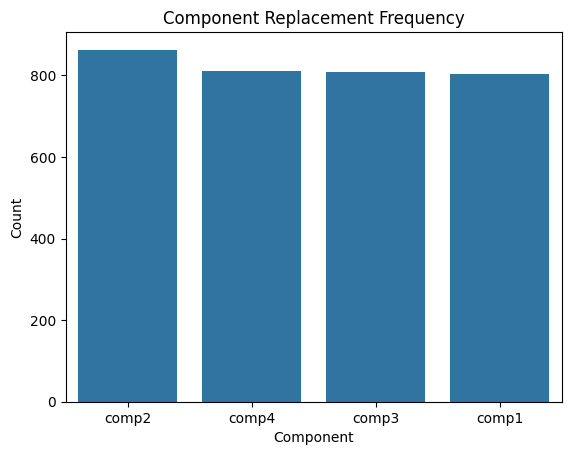

In [63]:
plt.figure()
sns.countplot(data=maintenance, x='comp', order=maintenance['comp'].value_counts().index)
plt.title("Component Replacement Frequency")
plt.xlabel("Component")
plt.ylabel("Count")
plt.show()

In [64]:
print("\nComponent Frequency Table:")
print(maintenance['comp'].value_counts())


Component Frequency Table:
comp
comp2    863
comp4    811
comp3    808
comp1    804
Name: count, dtype: int64


In [67]:
print("Maintenance Count by Machine:")
print(maintenance.groupby('machineID')['comp'].count())

Maintenance Count by Machine:
machineID
1      37
2      32
3      37
4      33
5      35
       ..
96     33
97     34
98     37
99     34
100    28
Name: comp, Length: 100, dtype: int64


In [69]:
maintenance['time_diff'] = maintenance.groupby('machineID')['datetime'].diff()

maintenance[['machineID', 'datetime', 'comp', 'time_diff']]

,machineID,datetime,comp,time_diff
0,1,2014-06-01 06:00:00,comp2,NaT
1,1,2014-07-16 06:00:00,comp4,45 days
2,1,2014-07-31 06:00:00,comp3,15 days
3,1,2014-12-13 06:00:00,comp1,135 days
4,1,2015-01-05 06:00:00,comp4,23 days
...,...,...,...,...
3281,100,2015-10-10 06:00:00,comp3,0 days
3282,100,2015-10-25 06:00:00,comp4,15 days
3283,100,2015-11-09 06:00:00,comp4,15 days
3284,100,2015-12-09 06:00:00,comp2,30 days


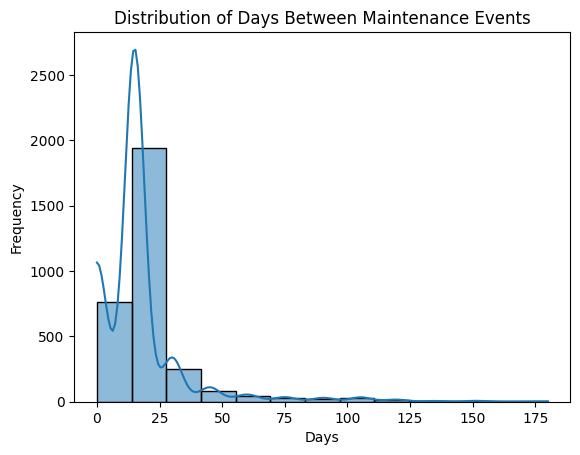

In [71]:
plt.figure()
sns.histplot(maintenance['time_diff'].dt.days, kde=True)
plt.title("Distribution of Days Between Maintenance Events")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()

# Joins

In [84]:
failures_merged = failures.merge(machines, on="machineID", how="left")
failures_merged

,datetime,machineID,failure,time_diff,model,age
0,2015-01-05 06:00:00,1,comp4,NaT,model3,18
1,2015-03-06 06:00:00,1,comp1,60 days,model3,18
2,2015-04-20 06:00:00,1,comp2,45 days,model3,18
3,2015-06-19 06:00:00,1,comp4,60 days,model3,18
4,2015-09-02 06:00:00,1,comp4,75 days,model3,18
...,...,...,...,...,...,...
756,2015-11-29 06:00:00,99,comp3,30 days,model1,14
757,2015-12-14 06:00:00,99,comp4,15 days,model1,14
758,2015-02-12 06:00:00,100,comp1,NaT,model4,5
759,2015-09-10 06:00:00,100,comp1,210 days,model4,5


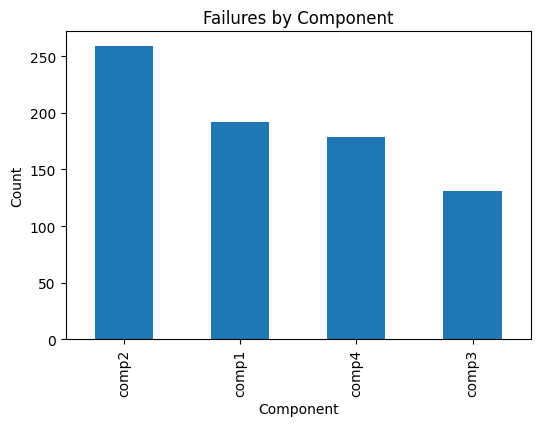

In [85]:
plt.figure(figsize=(6,4))
failures_merged['failure'].value_counts().plot(kind='bar')
plt.title("Failures by Component")
plt.xlabel("Component")
plt.ylabel("Count")
plt.show()

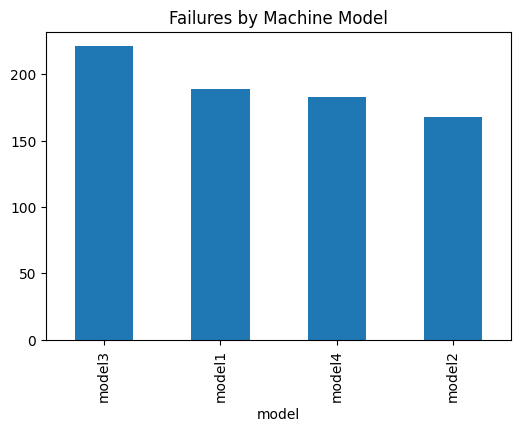

In [86]:
plt.figure(figsize=(6,4))
failures_merged['model'].value_counts().plot(kind='bar')
plt.title("Failures by Machine Model")
plt.show()


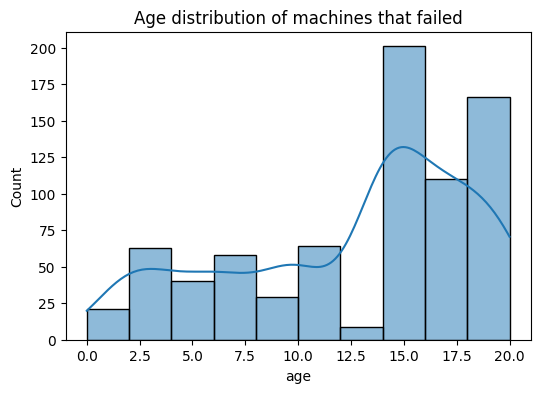

In [87]:
plt.figure(figsize=(6,4))
sns.histplot(failures_merged['age'], bins=10, kde=True)
plt.title("Age distribution of machines that failed")
plt.show()

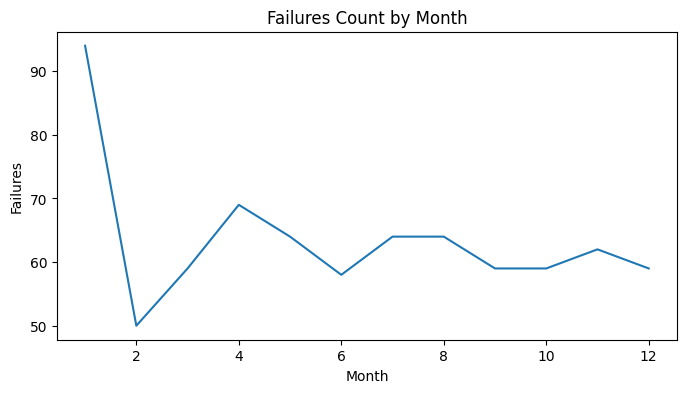

In [88]:
plt.figure(figsize=(8,4))
failures.groupby(failures['datetime'].dt.month).size().plot(kind='line')
plt.title("Failures Count by Month")
plt.xlabel("Month")
plt.ylabel("Failures")
plt.show()

In [74]:
telemetry_merged = telemetry.merge(machines, on="machineID", how="left")

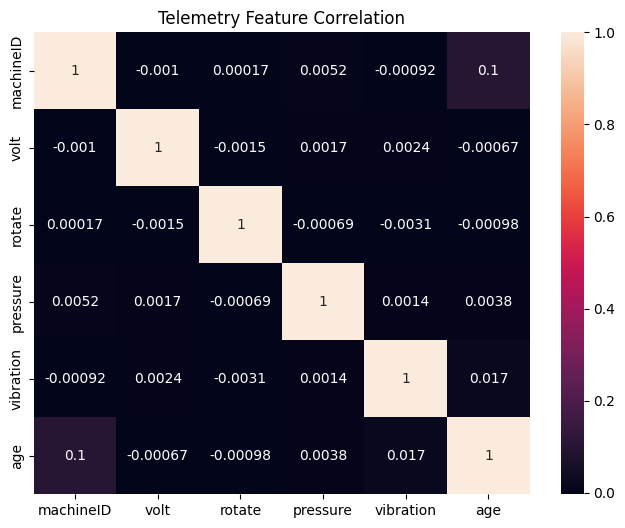

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(telemetry_merged.select_dtypes(np.number).corr(), annot=True)
plt.title("Telemetry Feature Correlation")
plt.show()

In [75]:
errors_merged = errors.merge(machines, on="machineID", how="left")

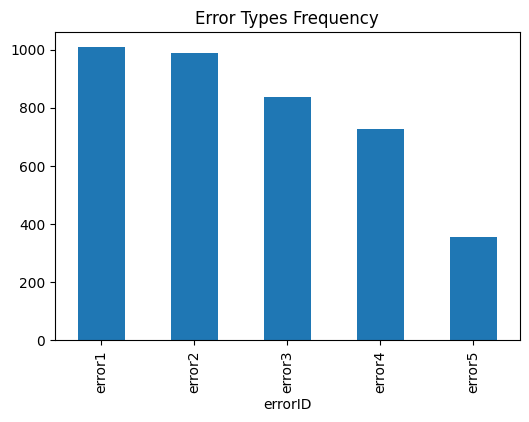

In [89]:
plt.figure(figsize=(6,4))
errors_merged['errorID'].value_counts().plot(kind='bar')
plt.title("Error Types Frequency")
plt.show()

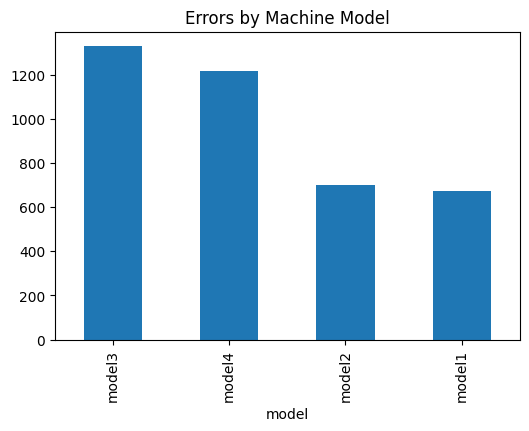

In [90]:
plt.figure(figsize=(6,4))
errors_merged['model'].value_counts().plot(kind='bar')
plt.title("Errors by Machine Model")
plt.show()

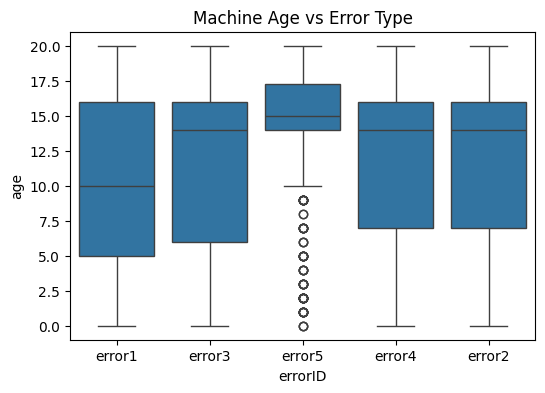

In [91]:
plt.figure(figsize=(6,4))
sns.boxplot(x='errorID', y='age', data=errors_merged)
plt.title("Machine Age vs Error Type")
plt.show()

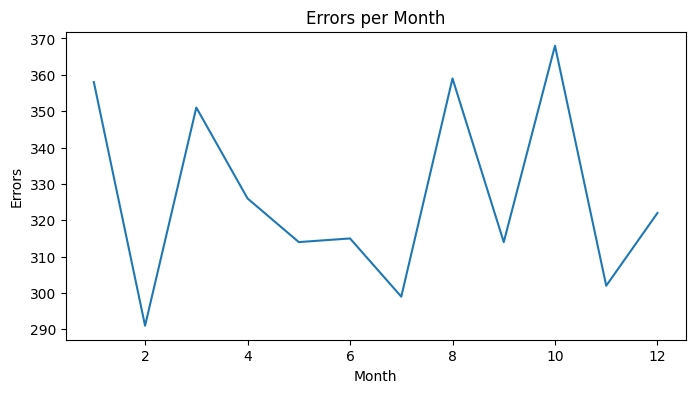

In [92]:
plt.figure(figsize=(8,4))
errors_merged.groupby(errors_merged['datetime'].dt.month).size().plot()
plt.title("Errors per Month")
plt.xlabel("Month")
plt.ylabel("Errors")
plt.show()

In [97]:
ef = errors.merge(failures, on='machineID', suffixes=('_error', '_failure'))
ef = ef[ef['datetime_error'] < ef['datetime_failure']]

In [98]:
ef['time_diff'] = ef['datetime_failure'] - ef['datetime_error']

ef_24h = ef[ef['time_diff'].dt.total_seconds() <= 24 * 3600]

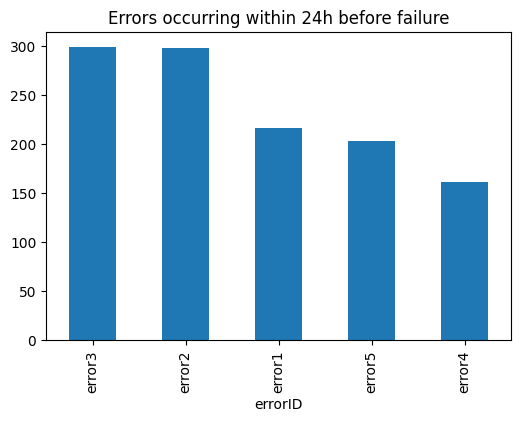

In [99]:
plt.figure(figsize=(6,4))
ef_24h['errorID'].value_counts().plot(kind='bar')
plt.title("Errors occurring within 24h before failure")
plt.show()

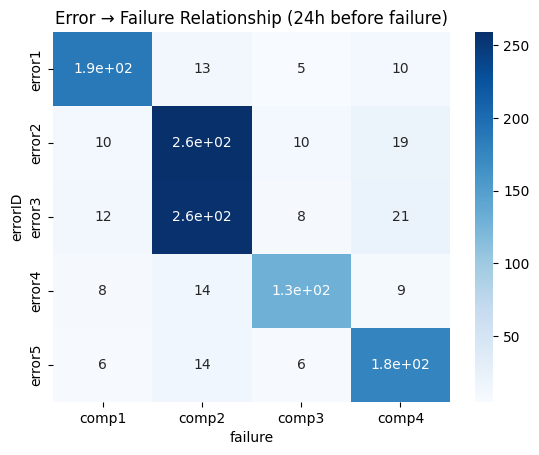

In [101]:
error_failure_matrix = pd.crosstab(ef_24h['errorID'], ef_24h['failure'])
sns.heatmap(error_failure_matrix, annot=True, cmap="Blues")
plt.title("Error → Failure Relationship (24h before failure)")
plt.show()

In [105]:

tf = telemetry.merge(failures, on='machineID', suffixes=('_tele', '_fail'))
tf = tf[tf['datetime_tele'] < tf['datetime_fail']]
tf['time_diff'] = tf['datetime_fail'] - tf['datetime_tele']

In [106]:
tf_48h = tf[tf['time_diff'].dt.total_seconds() <= 48 * 3600]

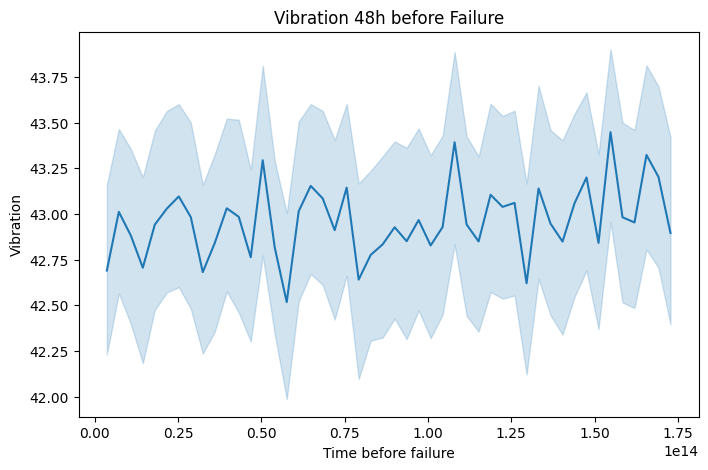

In [107]:
plt.figure(figsize=(8,5))
sns.lineplot(data=tf_48h, x='time_diff', y='vibration')
plt.title("Vibration 48h before Failure")
plt.xlabel("Time before failure")
plt.ylabel("Vibration")
plt.show()

/tmp/ipython-input-1633943832.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tf_48h['vibration_roll_mean'] = (


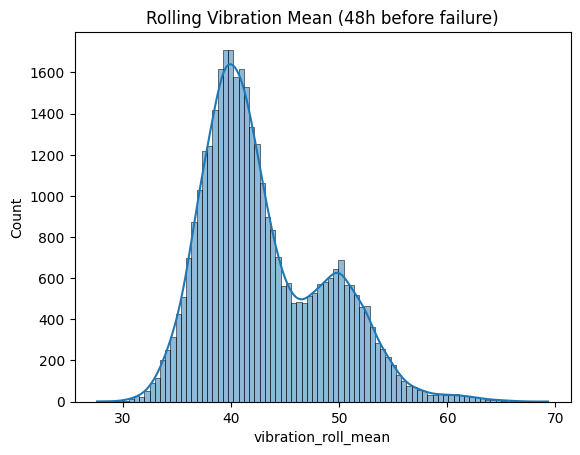

In [109]:
tf_48h['vibration_roll_mean'] = (
    tf_48h.groupby('machineID')['vibration'].rolling(3).mean().reset_index(level=0, drop=True)
)
sns.histplot(tf_48h['vibration_roll_mean'], kde=True)
plt.title("Rolling Vibration Mean (48h before failure)")
plt.show()